In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [49]:
df  = pd.read_csv('company.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
df.shape

(1000, 5)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [52]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

# ✅ Visuals:

## Profit vs R&D Spend

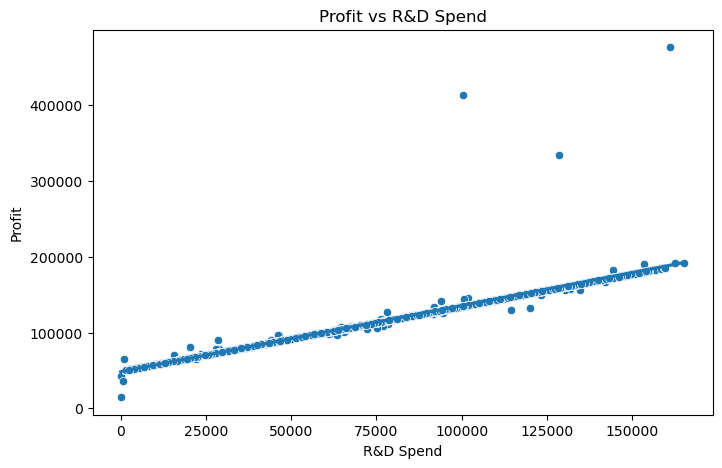

In [53]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='R&D Spend', y='Profit', data=df)
sns.regplot(x='R&D Spend', y='Profit', data=df, scatter=False)

plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

The scatter plot between R&D Spend and Profit shows a strong positive linear relationship. As R&D expenditure increases, profit also increases consistently. The data points are closely aligned along an upward trend, indicating that R&D Spend is a major driver of profitability. This suggests that companies investing more in research and development tend to achieve higher profits, making R&D the most influential feature in the dataset.

## Profit vs Marketing Spend

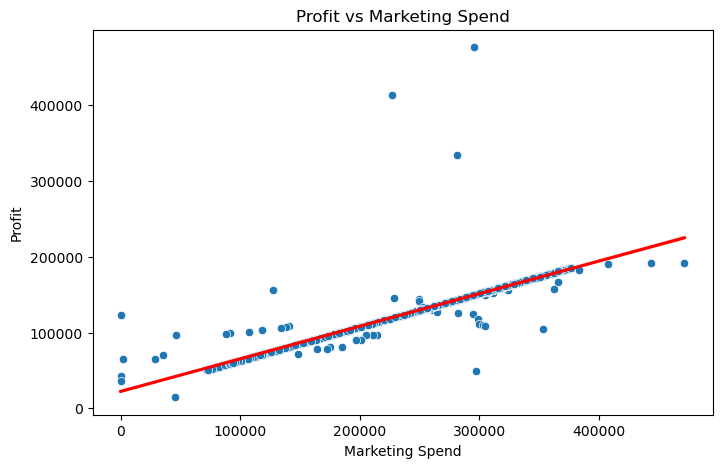

In [54]:
plt.figure(figsize=(8,5))

sns.regplot(x='Marketing Spend', y='Profit', data=df, scatter=False, color='red')
sns.scatterplot(x = 'Marketing Spend', y = 'Profit',data = df)

plt.title('Profit vs Marketing Spend')
plt.show()

The scatter plot between Marketing Spend and Profit shows a moderate positive relationship. Although profits generally increase with higher marketing expenditure, the data points are more scattered compared to R&D Spend. This indicates that marketing does contribute to profit growth, but its impact is less consistent and varies across companies. In some cases, high marketing spend does not result in proportionally high profits, suggesting diminishing returns or inefficient marketing strategies.

## State-wise Analysis

Average Profit per State

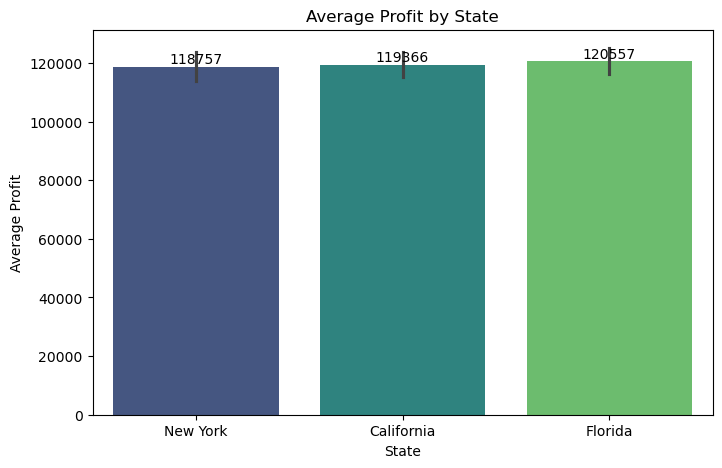

In [59]:
plt.figure(figsize=(8,5))

ax = sns.barplot(x='State', y='Profit', data=df, estimator='mean', palette = 'viridis')

ax.set_title('Average Profit by State')
ax.set_xlabel('State')
ax.set_ylabel('Average Profit')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f')

plt.show()

Profit distribution per State

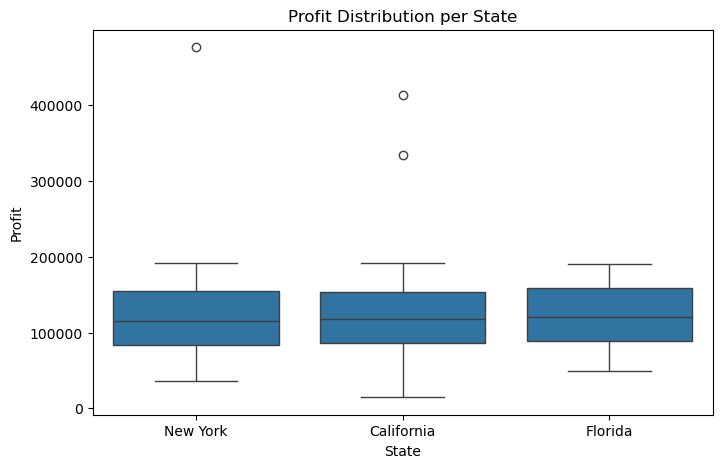

In [60]:
plt.figure(figsize=(8,5))

sns.boxplot(x='State', y='Profit', data=df)

plt.title('Profit Distribution per State')
plt.xlabel('State')
plt.ylabel('Profit')

plt.show()

The box plot shows the distribution of profit across different states. Each box represents the interquartile range (IQR), while the median indicates the central tendency of profit in each state. The variation in box sizes suggests that profit stability differs by state. Some states show a wider spread and presence of outliers, indicating higher risk but potential for greater returns, whereas other states exhibit more consistent profit levels.

How many companies are there in each state?

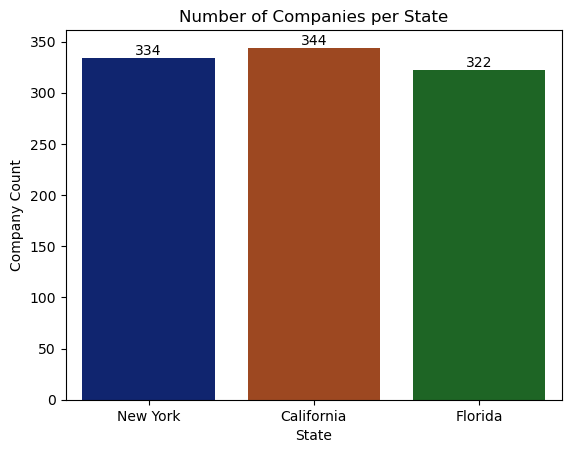

In [62]:
ax = sns.countplot(x = 'State', data = df, palette = 'dark')

plt.title('Number of Companies per State')
plt.xlabel('State')
plt.ylabel('Company Count')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

## Highest profit generator

Based on the state-wise average profit analysis, California generates the highest average profit among all states. This indicates that companies operating in California tend to be more profitable compared to those in other states, possibly due to better market opportunities, innovation-driven environments, and stronger economic conditions.

## Risky State Analysis (Project / Report)

Based on the profit distribution per state (box plot analysis), New York appears to be the most risky state as it shows the highest variation in profit. The wide interquartile range (IQR) and presence of outliers indicate that companies in this state experience highly inconsistent profit levels. This suggests higher business risk, but also the potential for higher returns.

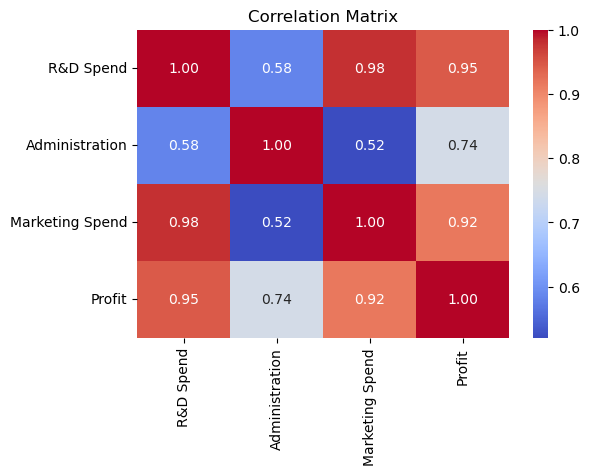

In [68]:
# Compute correlation matrix
corr = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix highlights that R&D Spend is the primary driver of profit, followed by Marketing Spend. Administrative costs are less influential. High correlation between R&D and Marketing suggests that companies pursuing innovation often invest simultaneously in marketing. Overall, strategic allocation to R&D and marketing is key for maximizing profitability.

## Spending Efficiency Analysis

In [71]:
# Profit per R&D Dollar:
df['Profit_per_RnD'] = df['Profit'] / df['R&D Spend']

In [70]:
# Total Spend:
df['Total_Spend'] = df['R&D Spend'] + df['Marketing Spend'] + df['Administration']

Visualizations

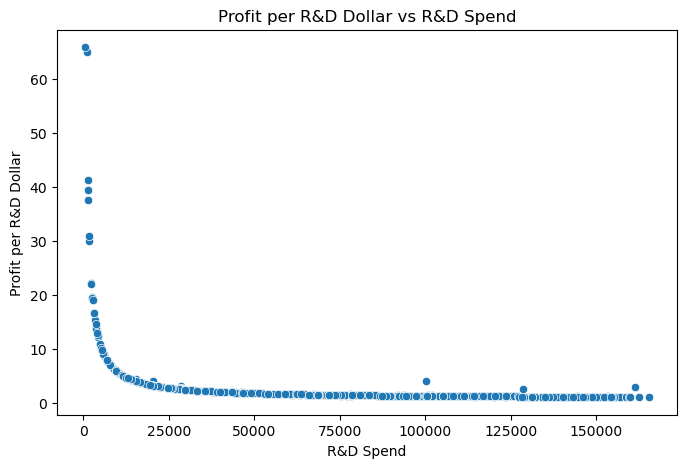

In [72]:
# A) Profit Efficiency (Profit / R&D Spend)

plt.figure(figsize=(8,5))
sns.scatterplot(x='R&D Spend', y='Profit_per_RnD', data=df)
plt.title('Profit per R&D Dollar vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit per R&D Dollar')
plt.show()

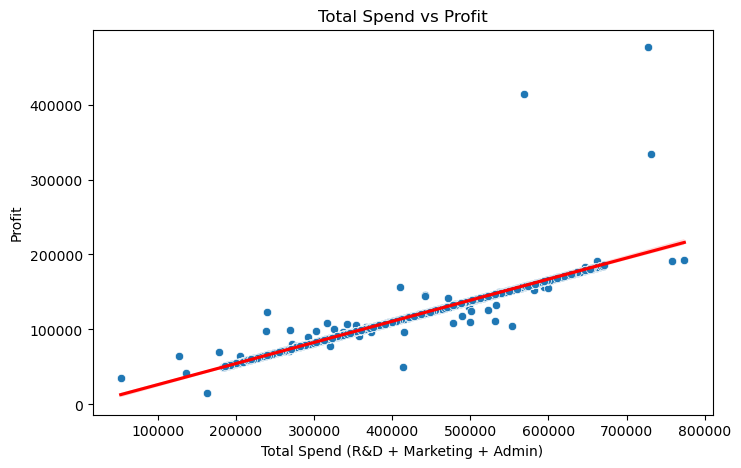

In [73]:
# B) Total Spend vs Profit

plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_Spend', y='Profit', data=df)
sns.regplot(x='Total_Spend', y='Profit', data=df, scatter=False, color='red')
plt.title('Total Spend vs Profit')
plt.xlabel('Total Spend (R&D + Marketing + Admin)')
plt.ylabel('Profit')
plt.show()
